In [7]:
import pandas as pd

# Load the dataset to preview its contents
file_path = r'C:\Users\Hp\OneDrive\INSA Research Project\processed-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [10]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
# Feature selection and target assignment
X = data.drop(columns=['Severity_None'])  # Replace 'Severity_None' with your target column
y = data['Severity_None']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Feature selection and target assignment
X = data.drop(columns=['Severity_None'])  # Replace 'Severity_None' with your target column
y = data['Severity_None']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [18]:
# Step 1: Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

In [19]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Step 2: Evaluate metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [24]:
import pandas as pd

# Creating a DataFrame to display metrics in table format
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "Mean Squared Error", "Mean Absolute Error"],
    "Value": [accuracy_gb, precision_gb, recall_gb, f1_gb, mse_gb, mae_gb]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

                Metric     Value
0             Accuracy  0.741888
1            Precision  0.478239
2               Recall  0.416323
3             F1 Score  0.445138
4   Mean Squared Error  0.258112
5  Mean Absolute Error  0.258112


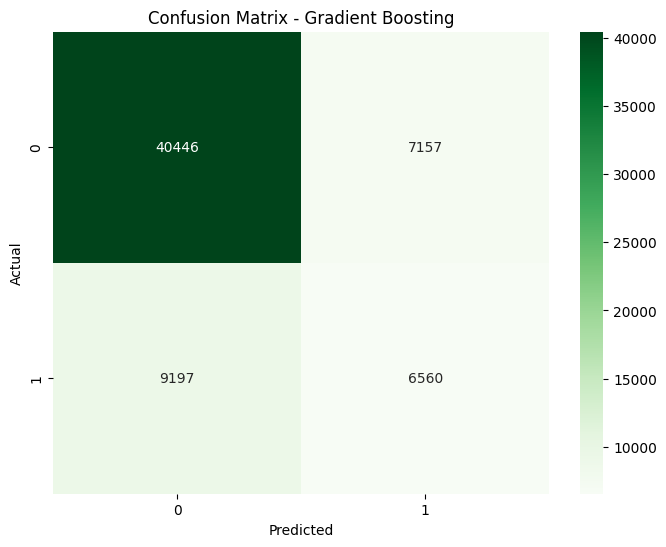

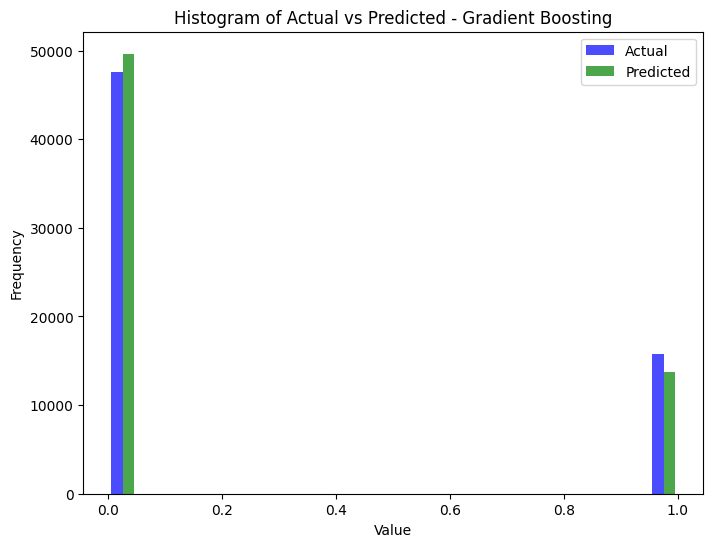

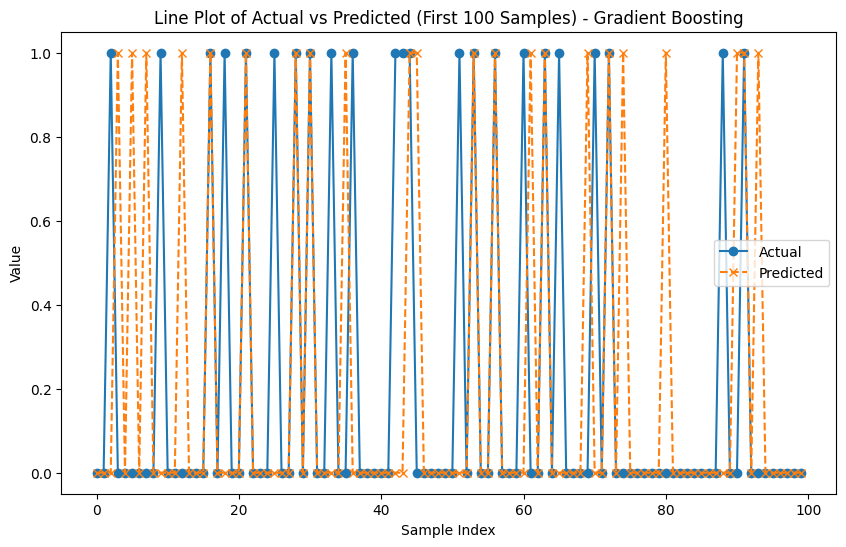

In [23]:
# Step 3: Visualization for Gradient Boosting results
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Histogram of results
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_pred_gb], bins=20, label=['Actual', 'Predicted'], color=['blue', 'green'], alpha=0.7)
plt.title('Histogram of Actual vs Predicted - Gradient Boosting')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Line plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', linestyle='-', marker='o')
plt.plot(y_pred_gb[:100], label='Predicted', linestyle='--', marker='x')
plt.title('Line Plot of Actual vs Predicted (First 100 Samples) - Gradient Boosting')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [29]:
# Select a test instance for counterfactual explanation
test_instance = X_test_scaled[0].reshape(1, -1)  # Example: First test instance
original_prediction = gb_model.predict(test_instance)[0]
print("Original Prediction:", original_prediction)

Original Prediction: 0


In [52]:
import shap
# SHAP Analysis
explainer = shap.Explainer(gb_model, X_train_scaled)
shap_values = explainer(test_instance)

# Visualize SHAP values
shap.force_plot(
    explainer.expected_value,  # Use scalar value directly
    shap_values.values[0],  # SHAP values for the instance
    feature_names=X.columns
)

# Counterfactual Analysis
# Modify the most impactful feature to flip the prediction
shap_values_instance = shap_values.values[0]  # SHAP values for the instance
impactful_features = np.argsort(np.abs(shap_values_instance))[::-1]  # Features sorted by importance

# Create a copy of the test instance
counterfactual_instance = test_instance.copy()

for feature_idx in impactful_features:
    # Adjust feature value
    step_size = 0.1  # Increment size
    max_adjustments = 10  # Max number of changes per feature

    for _ in range(max_adjustments):
        counterfactual_instance[0, feature_idx] += step_size
        new_prediction = gb_model.predict(counterfactual_instance)[0]
        if new_prediction == 1:  # Desired class
            print(f"Counterfactual achieved by modifying feature: {X.columns[feature_idx]}")
            break

    if new_prediction == 1:
        break

# Compare Original vs Counterfactual
original_instance = scaler.inverse_transform(test_instance)
counterfactual_instance_inverse = scaler.inverse_transform(counterfactual_instance)

# Create a DataFrame to compare original vs counterfactual instances
comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Original Instance': original_instance.flatten(),
    'Counterfactual Instance': counterfactual_instance_inverse.flatten()
})

# Display the comparison in tabular form
print(comparison_df)


                    Feature  Original Instance  Counterfactual Instance
0                 Tiredness       0.000000e+00                 0.500000
1                 Dry-Cough       1.000000e+00                 1.496065
2   Difficulty-in-Breathing       1.000000e+00                 1.500000
3               Sore-Throat       1.000000e+00                 1.463723
4              None_Sympton       6.938894e-18                 0.241912
5                     Pains       0.000000e+00                 0.480930
6          Nasal-Congestion       1.000000e+00                 1.497954
7                Runny-Nose       0.000000e+00                 0.497922
8         None_Experiencing       0.000000e+00                 0.287272
9                   Age_0-9       0.000000e+00                 0.399828
10                Age_10-19       0.000000e+00                 0.400059
11                Age_20-24       0.000000e+00                 0.399914
12                Age_25-59       1.000000e+00                 1